# HumanActivity, PCA

-HumanActivity 데이터 읽어서 컬럼을 300개 이하로 축소(PCA)시켜서, RandomForest 모델로 분류

- 최종결과
- 테스트 데이터의 정확도
- Confusion Matrix 표시

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

In [3]:
human = pd.read_csv('./HumanActivityRecognition/train.csv')
human.shape

(7352, 563)

In [4]:
X = human.drop(['Activity'], axis=1)

In [5]:
y = human['Activity']

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X) 

X_train[:5]

array([[ 0.20064157, -0.0636826 , -0.41962845, ...,  0.40794614,
        -0.00756789, -1.8288513 ],
       [ 0.05594788,  0.03148567, -0.25390836, ...,  0.40911698,
         0.00787517, -1.8288513 ],
       [ 0.07351535, -0.04341648, -0.07629468, ...,  0.4102883 ,
         0.02650234, -1.8288513 ],
       [ 0.06669577, -0.20842166, -0.24971245, ...,  0.41465007,
         0.03171414, -1.8288513 ],
       [ 0.03046897,  0.02758722, -0.10984784, ...,  0.42546296,
         0.04522502, -1.8288513 ]])

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=300)
X_train = pca.fit_transform(X)

X_train[:5]

array([[ 1.57272239e+01, -7.24625881e+00, -4.65589364e-01, ...,
        -6.52566600e-02, -5.10165261e-02, -4.85891594e-02],
       [ 1.57233170e+01, -7.26069038e+00, -2.59002156e-01, ...,
         4.96633680e-03,  1.66623651e-03, -5.88407415e-02],
       [ 1.57425696e+01, -7.20400561e+00,  1.06483367e-01, ...,
        -4.72960038e-03,  1.35337807e-03,  1.16513802e-02],
       [ 1.57156658e+01, -7.40380658e+00,  7.19930551e-01, ...,
        -3.85262171e-02,  6.27723766e-03,  1.50187312e-02],
       [ 1.57031530e+01, -7.47370660e+00,  9.87219533e-01, ...,
        -7.05315700e-03,  1.36420622e-02, -1.08217050e-02]])

In [44]:
y

array([2, 2, 2, ..., 5, 5, 5], dtype=int64)

In [56]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y)
y_train[:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [57]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=30, max_depth=3) 
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=30)

In [58]:
clf.score(X_train, y_train)

0.8079434167573449

In [59]:
y_pred = clf.predict(X_train)
y_pred

array([2, 1, 2, ..., 5, 5, 5], dtype=int64)

In [60]:
humantest = pd.read_csv('./HumanActivityRecognition/test.csv')
humantest.shape

(2947, 563)

In [61]:
X_test = humantest.drop(['Activity'], axis=1)

In [62]:
y_test = humantest['Activity']

In [63]:
X_tests = scaler.transform(X_test) 

X_tests[:5]

array([[-0.24638762, -0.13697895,  1.66846245, ...,  0.73357141,
        -0.00524394, -1.71742488],
       [ 0.164235  ,  0.11105901, -0.17554768, ...,  0.7488403 ,
        -0.09811176, -1.71742488],
       [ 0.01418651, -0.20474035, -0.15911067, ...,  0.7446048 ,
        -0.08180304, -1.71742488],
       [-0.05963721, -0.36557865, -0.14795978, ...,  0.7581554 ,
        -0.07378381, -1.71742488],
       [ 0.00490808, -0.24878512, -0.35997985, ...,  0.78037094,
        -0.0621351 , -1.71742488]])

In [64]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_tests = encoder.fit_transform(y_test)
y_tests[:5]

array([2, 2, 2, 2, 2])

In [65]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=30, max_depth=3) 
clf.fit(X_tests, y_tests)

RandomForestClassifier(max_depth=3, n_estimators=30)

In [66]:
clf.score(X_tests, y_tests)

0.8700373260943333

In [67]:
y_pred = clf.predict(X_tests)

In [68]:
my.print_score(y_tests, y_pred)

accuraccy: 0.8700373260943333
precision: 0.8789071294358403
recall: 0.8657667235946377


In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc = accuracy_score(y_tests, y_pred)
pre = precision_score(y_tests, y_pred, average = 'macro')
rec = recall_score(y_tests, y_pred, average = 'macro')

print('accuraccy:', acc)
print('precision:', pre)
print('recall:', rec)

accuraccy: 0.8700373260943333
precision: 0.8789071294358403
recall: 0.8657667235946377


In [70]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_tests, y_pred)
cfm

array([[537,   0,   0,   0,   0,   0],
       [  0, 306, 185,   0,   0,   0],
       [  0,  43, 489,   0,   0,   0],
       [  0,   0,   0, 466,  17,  13],
       [  0,   0,   0,  34, 335,  51],
       [  0,   0,   0,  25,  15, 431]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

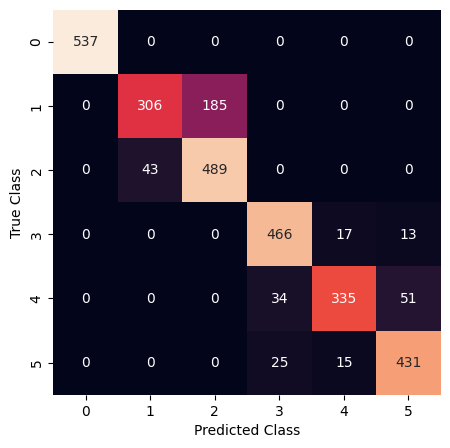

In [71]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_tests, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cfm, fmt='d', annot=True, cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show

In [74]:
from sklearn.decomposition import PCA   #컬럼 300으로 축소

pca = PCA(n_components=300)
X_tests = pca.fit_transform(X_tests)

X_tests[:5]

array([[-10.10558529,  -2.25678385,  -0.6610411 , ...,  -0.07408125,
          0.13676378,  -0.04233072],
       [-12.90227887,  -1.67156546,  -3.51213162, ...,   0.19541295,
         -0.11161135,  -0.01932816],
       [-14.23512886,   1.84154178,  -2.47027745, ...,   0.07756616,
         -0.05304256,  -0.07038317],
       [-14.49740878,   1.12460514,  -2.91774559, ...,  -0.03938017,
          0.05328362,  -0.0847587 ],
       [-13.62305744,  -2.50782019,  -3.6226438 , ...,   0.1472496 ,
         -0.02398322,  -0.07376576]])

In [75]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=30, max_depth=3) 
clf.fit(X_tests, y_tests)

RandomForestClassifier(max_depth=3, n_estimators=30)

In [76]:
clf.score(X_tests, y_tests)

0.8510349507974211

In [77]:
y_pred = clf.predict(X_tests)

In [78]:
my.print_score(y_tests, y_pred)

accuraccy: 0.8510349507974211
precision: 0.8673568891714489
recall: 0.8474038867713855


In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc = accuracy_score(y_tests, y_pred)
pre = precision_score(y_tests, y_pred, average = 'macro')
rec = recall_score(y_tests, y_pred, average = 'macro')

print('accuraccy:', acc)
print('precision:', pre)
print('recall:', rec)

accuraccy: 0.8510349507974211
precision: 0.8673568891714489
recall: 0.8474038867713855


In [80]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_tests, y_pred)
cfm

array([[515,   0,  15,   2,   0,   5],
       [ 17, 277, 189,   0,   1,   7],
       [ 13,  37, 475,   3,   0,   4],
       [  0,   0,   1, 479,   5,  11],
       [  0,   0,   0,  44, 329,  47],
       [  1,   0,   1,  33,   3, 433]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

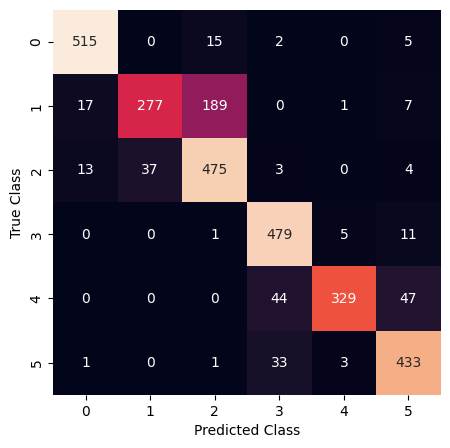

In [81]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_tests, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cfm, fmt='d', annot=True, cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show